# Loan Defaulter Risk Analysis(EDA)

## Introduction


This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that we have learnt in the EDA module, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers

##  Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# this will enable pandas to show all the items
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Loading Datasets

In [2]:
df_app = pd.read_csv("Dataset/application_data.csv")
df_prev = pd.read_csv("Dataset/previous_application.csv")

In [4]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Data Cleaning & Manipulation

### Check the presence of missing values

In [5]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
df_app.shape

(307511, 122)

In [7]:
df_app.isnull().sum().sort_values()   # it shows How many have null values 

SK_ID_CURR                           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                    0
FLAG_DOCUMENT_21                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_19                     0
FLAG_DOCUMENT_18                     0
FLAG_DOCUMENT_17                     0
FLAG_DOCUMENT_16                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_12                     0
FLAG_DOCUMENT_11                     0
FLAG_DOCUMENT_10                     0
FLAG_DOCUMENT_9                      0
FLAG_DOCUMENT_8                      0
FLAG_DOCUMENT_7                      0
FLAG_DOCUMENT_6                      0
FLAG_DOCUMENT_5                      0
FLAG_DOCUMENT_4          

In [8]:
df_app_info = pd.DataFrame(df_app.isnull().sum().sort_values()).reset_index()  
df_app_info.rename(columns={"index":"Cols_name",0:'null_count'},inplace=True)
df_app_info

,Cols_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0
5,REG_CITY_NOT_WORK_CITY,0
6,LIVE_CITY_NOT_WORK_CITY,0
7,ORGANIZATION_TYPE,0
8,FLAG_DOCUMENT_21,0
9,FLAG_DOCUMENT_20,0


In [9]:
df_app_info['percentage %'] =  df_app_info['null_count']/df_app.shape[0] * 100

In [10]:
df_app_info

,Cols_name,null_count,percentage %
0,SK_ID_CURR,0,0.000000
1,HOUR_APPR_PROCESS_START,0,0.000000
2,REG_REGION_NOT_WORK_REGION,0,0.000000
3,LIVE_REGION_NOT_WORK_REGION,0,0.000000
4,REG_CITY_NOT_LIVE_CITY,0,0.000000
5,REG_CITY_NOT_WORK_CITY,0,0.000000
6,LIVE_CITY_NOT_WORK_CITY,0,0.000000
7,ORGANIZATION_TYPE,0,0.000000
8,FLAG_DOCUMENT_21,0,0.000000
9,FLAG_DOCUMENT_20,0,0.000000


In [11]:
missing_cols = df_app_info[df_app_info['percentage %']>=40]['Cols_name'].to_list()
df_app_msng_rmd = df_app.drop(labels=missing_cols,axis=1)

In [12]:
#After removing unwanted colnums
df_app_msng_rmd.shape

(307511, 73)

In [13]:
df_app_msng_rmd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
flag_cols = []

for i in df_app_msng_rmd.columns:
    if i.startswith('FLAG_'):
        flag_cols.append(i)

len(flag_cols)

28

In [15]:
flag_target_col = df_app_msng_rmd[flag_cols+["TARGET"]].head()
flag_target_col.head()


,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


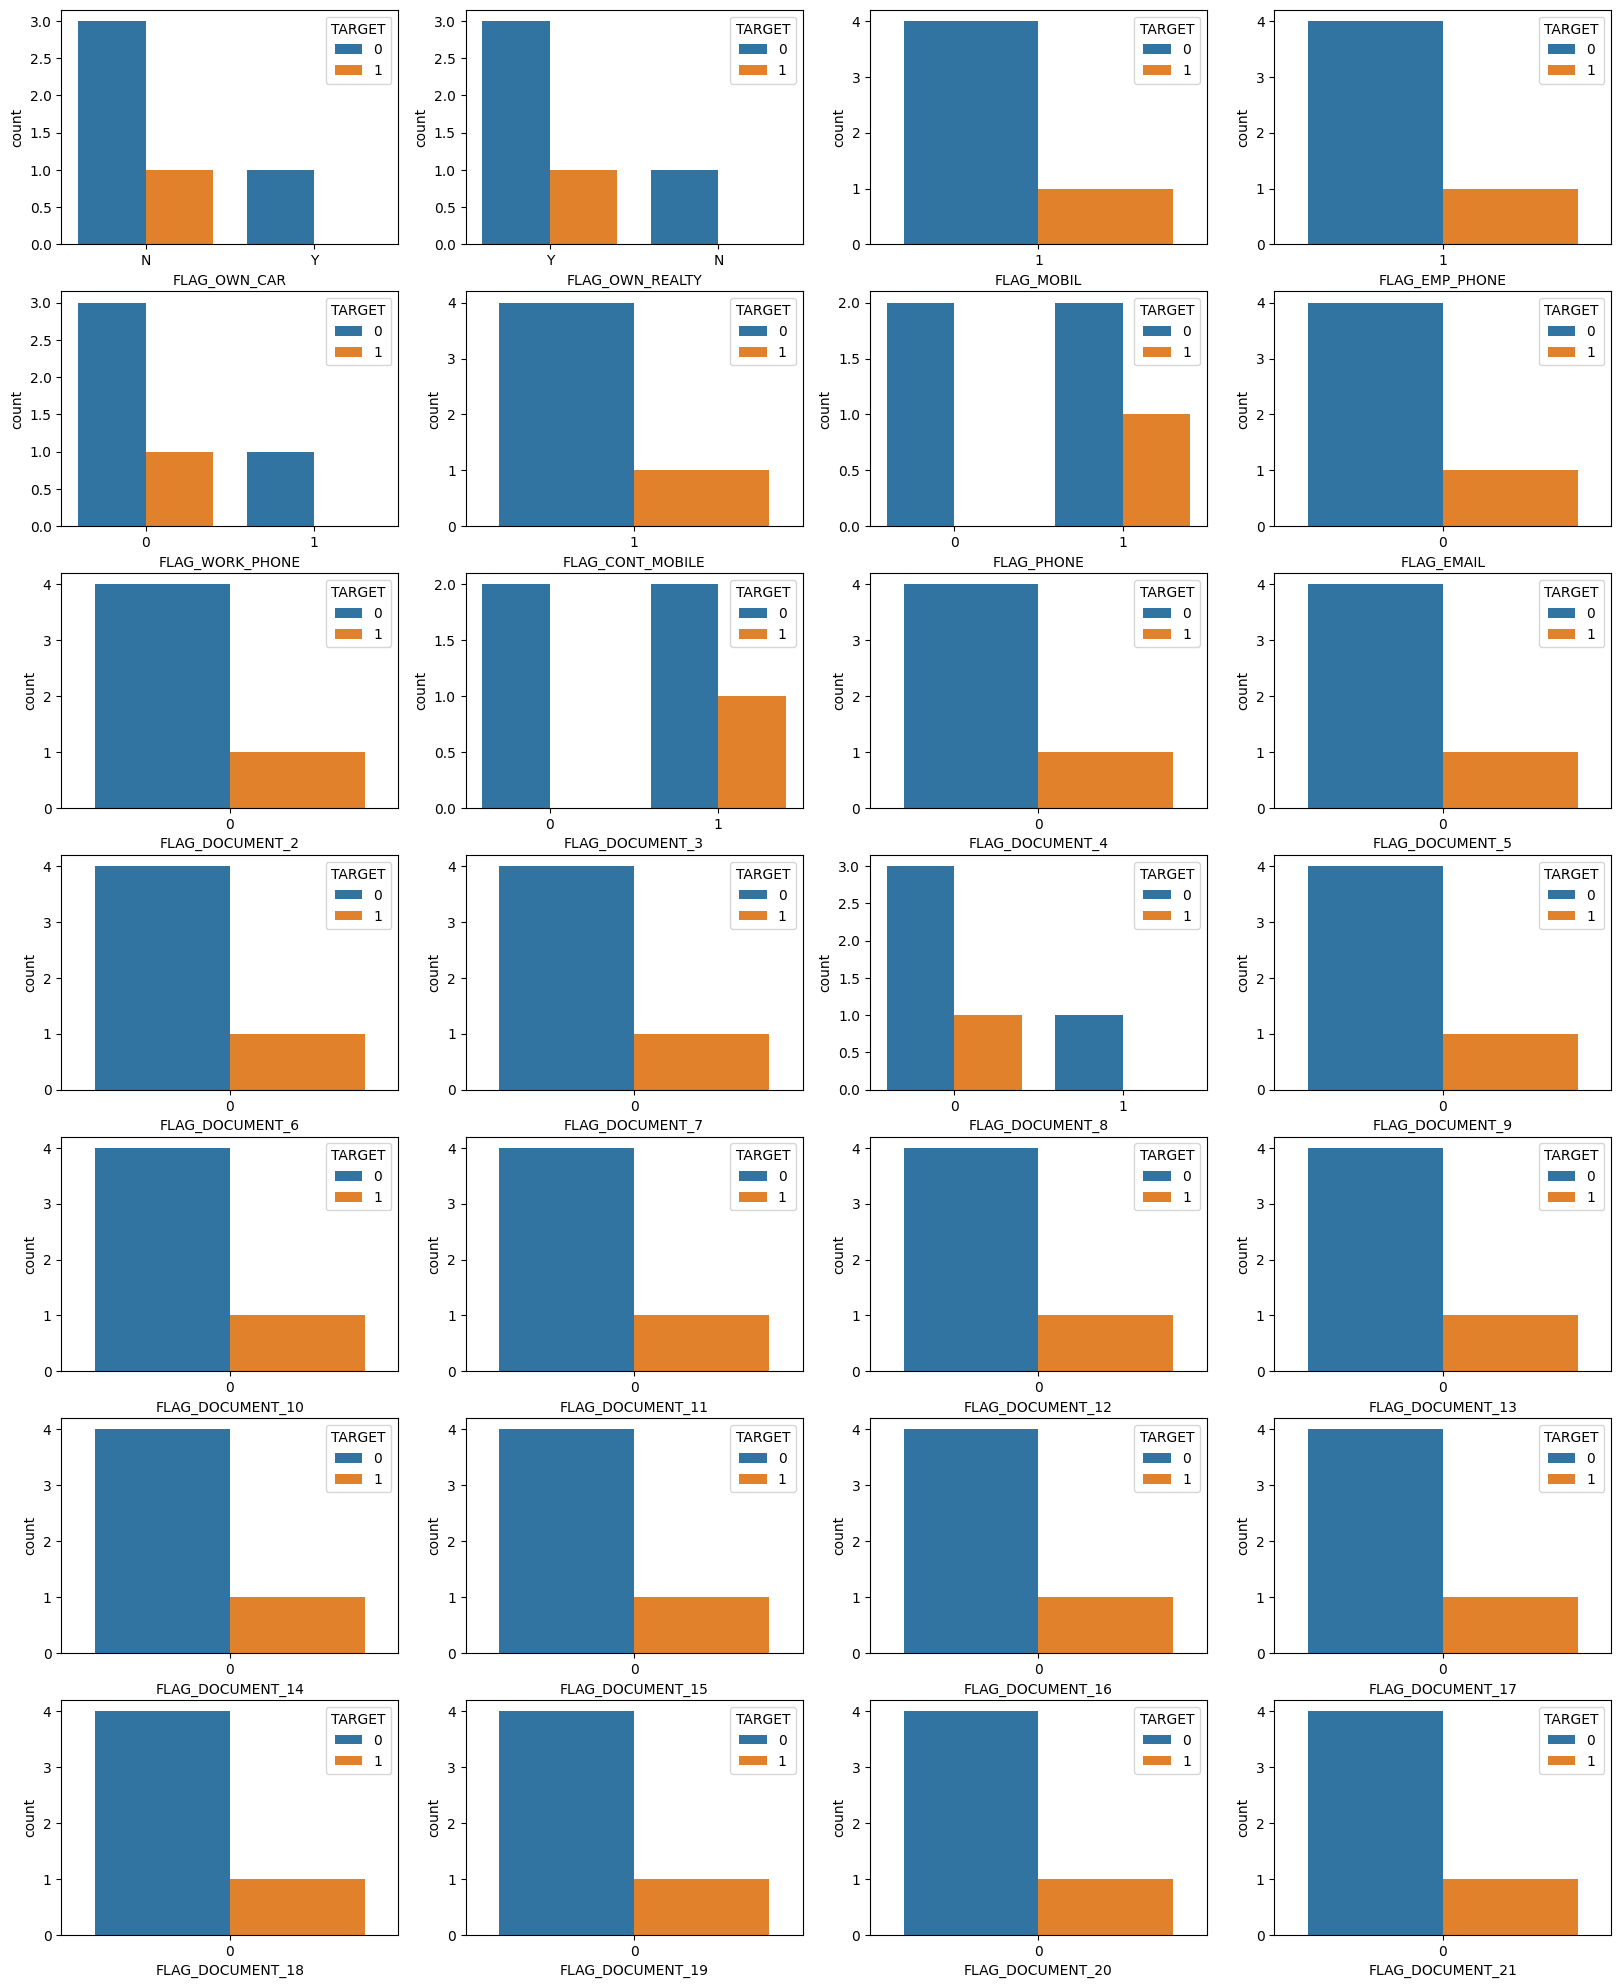

In [16]:
plt.figure(figsize=(20,25))
for i,col in enumerate(flag_cols):
    plt.subplot(7,4,i+1)
    
    sns.countplot(data=flag_target_col,x=col,hue="TARGET");

C:\Users\Hariram\AppData\Local\Temp\ipykernel_3448\669372860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_CAR'] =flag_corr_df['FLAG_OWN_CAR'].replace(['N','Y'],[0,1])
C:\Users\Hariram\AppData\Local\Temp\ipykernel_3448\669372860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_corr_df['FLAG_OWN_REALTY'] =flag_corr_df['FLAG_OWN_REALTY'].replace(['N','Y'],[0,1])


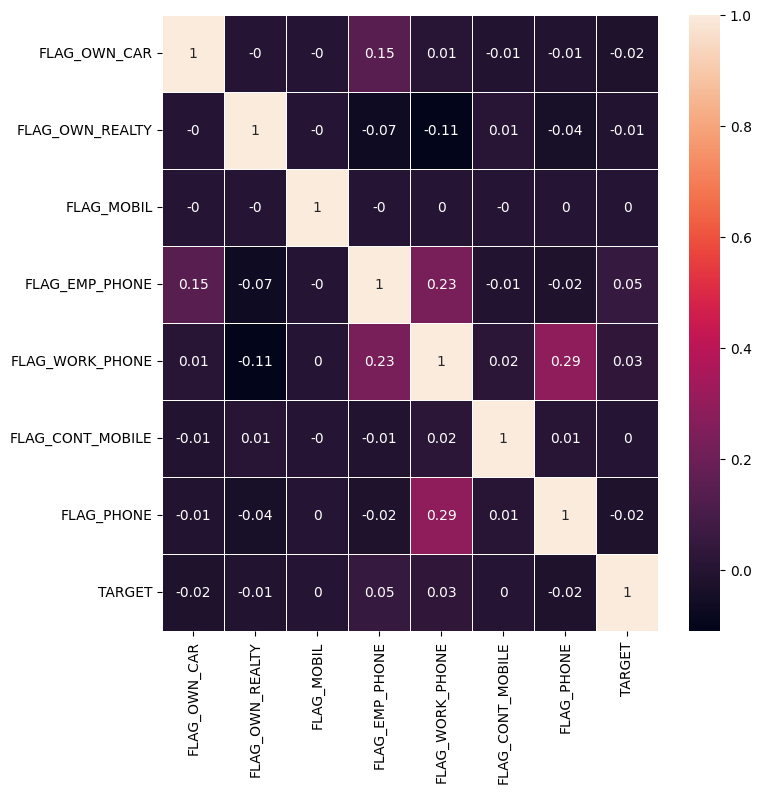

In [17]:
flag_corr = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','TARGET']
flag_corr_df = df_app_msng_rmd[flag_corr]


flag_corr_df['FLAG_OWN_CAR'] =flag_corr_df['FLAG_OWN_CAR'].replace(['N','Y'],[0,1])
flag_corr_df['FLAG_OWN_REALTY'] =flag_corr_df['FLAG_OWN_REALTY'].replace(['N','Y'],[0,1])

plt.figure(figsize=(8,8))
sns.heatmap(round(flag_corr_df.corr(),2),linewidths=.5,annot=True);


In [18]:
df_app_flag_rmd = df_app_msng_rmd.drop(labels=flag_cols,axis=1)
df_app_flag_rmd.shape

(307511, 45)

In [19]:
df_app_flag_rmd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


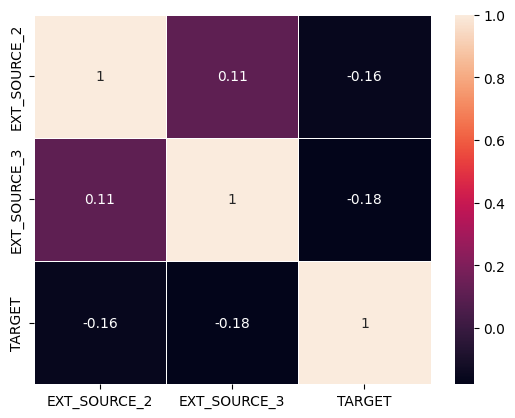

In [20]:
sns.heatmap(data=round(df_app_flag_rmd[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),linewidths=.5,annot=True);

In [21]:
df_app_score_rmd = df_app_flag_rmd.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)
df_app_score_rmd.shape

(307511, 43)

## Feature Enginnering

In [22]:
df_app_score_rmd.isnull().sum().sort_values()/df_app_score_rmd.shape[0]

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


### Missing imputation

In [23]:
df_app_score_rmd['CNT_FAM_MEMBERS'] = df_app_score_rmd['CNT_FAM_MEMBERS'].fillna((df_app_score_rmd['CNT_FAM_MEMBERS'].mode()[0]))

In [24]:
df_app_score_rmd['CNT_FAM_MEMBERS'].isnull().sum()

0

In [25]:
df_app_score_rmd["OCCUPATION_TYPE"] = df_app_score_rmd['OCCUPATION_TYPE'].fillna((df_app_score_rmd['OCCUPATION_TYPE'].mode()[0]))

In [26]:
df_app_score_rmd['OCCUPATION_TYPE'].isnull().sum()

0

In [27]:
df_app_score_rmd["NAME_TYPE_SUITE"] = df_app_score_rmd['NAME_TYPE_SUITE'].fillna((df_app_score_rmd['NAME_TYPE_SUITE'].mode()[0]))

In [28]:
df_app_score_rmd['NAME_TYPE_SUITE'].isnull().sum()

0

In [29]:
df_app_score_rmd["AMT_ANNUITY"] = df_app_score_rmd['AMT_ANNUITY'].fillna((df_app_score_rmd['AMT_ANNUITY'].mean()))

In [30]:
df_app_score_rmd['AMT_ANNUITY'].isnull().sum()

0

In [31]:
amt_req_col = []

for col in df_app_score_rmd.columns:
    if col.startswith("AMT_REQ_CREDIT_BUREAU"):
       amt_req_col.append(col) 

amt_req_col

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [32]:
for col in amt_req_col:
    df_app_score_rmd[col] = df_app_score_rmd[col].fillna((df_app_score_rmd[col].median()))
    

In [33]:
df_app_score_rmd[col].isnull().sum()

0

In [34]:
df_app_score_rmd.isnull().sum().sort_values()

SK_ID_CURR                        0
AMT_REQ_CREDIT_BUREAU_QRT         0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE                 0
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK        0
AMT_REQ_CREDIT_BUREAU_MON         0
CNT_FAM_MEMBERS                   0
OCCUPATION_TYPE                   0
REGION_RATING_CLIENT              0
DAYS_REGISTRATION                 0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
DAYS_ID_PUBLISH                   0
AMT_ANNUITY                       0
AMT_CREDIT                  

In [35]:
df_app_score_rmd["AMT_GOODS_PRICE"] = df_app_score_rmd['AMT_GOODS_PRICE'].fillna((df_app_score_rmd['AMT_GOODS_PRICE'].median()))

In [36]:
df_app_score_rmd["AMT_GOODS_PRICE"].isnull().sum()

0

### Value modification

In [37]:
days_col = []

for col in df_app_score_rmd.columns:
    if col.startswith("DAYS"):
        days_col.append(col)

days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [38]:
for col in days_col:
    df_app_score_rmd[col] = abs(df_app_score_rmd[col])

In [39]:
df_app_score_rmd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_app_score_rmd.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

In [41]:
df_app_score_rmd["OBS_30_CNT_SOCIAL_CIRCLE"].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

### Outlier detection & treatment

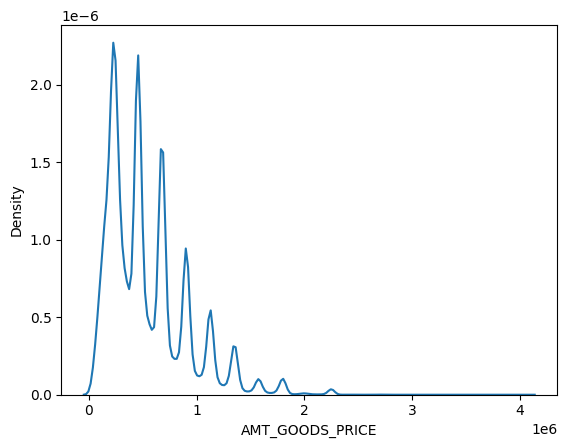

In [42]:
sns.kdeplot(data=df_app_score_rmd,x="AMT_GOODS_PRICE");

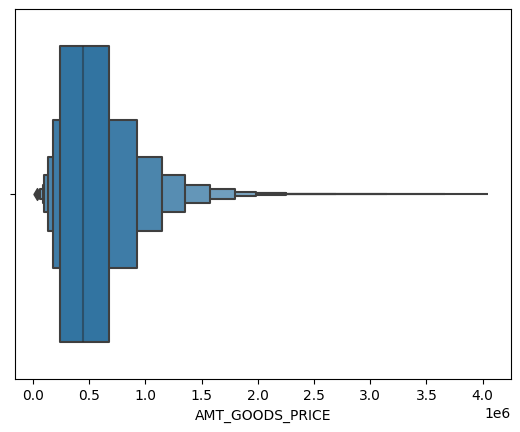

In [43]:
sns.boxenplot(data=df_app_score_rmd,x="AMT_GOODS_PRICE");

In [44]:
df_app_score_rmd["AMT_GOODS_PRICE"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [45]:
bins = [0 , 100000 , 200000 , 300000 , 400000 , 500000 , 600000 , 700000 , 800000 , 900000 , 4050000]
ranges = ['0k-100k' , '100k-200k' , '200k-300k' , '300k-400k' , '400k-500k' , '500k-600k' , '600k-700k' , '700k-800k' ,'800k-900k' , 'Above 900k']
df_app_score_rmd['AMT_GOODS_PRICE_RANGE'] = pd.cut(df_app_score_rmd["AMT_GOODS_PRICE"],bins,labels=ranges)

In [46]:
df_app_score_rmd.groupby(['AMT_GOODS_PRICE_RANGE']).size()

AMT_GOODS_PRICE_RANGE
0k-100k        8709
100k-200k     32956
200k-300k     62761
300k-400k     21219
400k-500k     57251
500k-600k     13117
600k-700k     40024
700k-800k      8110
800k-900k     21484
Above 900k    41880
dtype: int64

In [47]:
df_app_score_rmd["AMT_GOODS_PRICE_RANGE"].isnull().sum()

0

In [48]:
df_app_score_rmd["AMT_INCOME_TOTAL"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [49]:
df_app_score_rmd["AMT_INCOME_TOTAL"].max()

117000000.0

In [50]:
bins = [0 , 100000 ,150000, 200000 ,250000, 300000 ,350000, 400000 ,117000000 ]
ranges = ['0k-100k' , '100k-150k' , '150k-200k','200k-250k' ,'250k-300k' , '300k-350k','350k-400k' , 'Above 400k']
df_app_score_rmd['AMT_INCOME_TOTAL_RANGE'] = pd.cut(df_app_score_rmd["AMT_INCOME_TOTAL"],bins,labels=ranges)

In [51]:
df_app_score_rmd.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

AMT_INCOME_TOTAL_RANGE
0k-100k       63698
100k-150k     91591
150k-200k     64307
200k-250k     48137
250k-300k     17039
300k-350k      8874
350k-400k      5802
Above 400k     8063
dtype: int64

In [52]:
df_app_score_rmd["AMT_INCOME_TOTAL_RANGE"].isnull().sum()

0

In [53]:
df_app_score_rmd["AMT_CREDIT"].max()

4050000.0

In [54]:
df_app_score_rmd["AMT_CREDIT"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [55]:
bins = [0 , 200000 , 400000 , 600000 , 800000 , 900000 , 1000000 ,4050000.0]
ranges = ['0k-200k' ,  '200k-400k' , '400k-600k' , '600k-800k' , '800k-900k' , '900k-1M' , 'Above 1M']
df_app_score_rmd['AMT_CREDIT_RANGE'] = pd.cut(df_app_score_rmd["AMT_CREDIT"],bins,labels=ranges)

In [56]:
df_app_score_rmd.groupby(['AMT_CREDIT_RANGE']).size()

AMT_CREDIT_RANGE
0k-200k      36144
200k-400k    81151
400k-600k    66270
600k-800k    43242
800k-900k    21792
900k-1M       8927
Above 1M     49985
dtype: int64

In [57]:
df_app_score_rmd["AMT_CREDIT"].isnull().sum()

0

In [58]:
df_app_score_rmd["AMT_ANNUITY"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [59]:
df_app_score_rmd["AMT_ANNUITY"].max()

258025.5

In [60]:
bins = [0 , 25000, 50000 , 100000 , 150000 , 200000 , 258025.5]
ranges = ['0k-25k','25k-50k' , '50k-100k' ,'100k-150k' , '150k-200k', 'Above 200k']
df_app_score_rmd['AMT_ANNUITY_RANGE'] = pd.cut(df_app_score_rmd['AMT_ANNUITY'],bins,labels=ranges)

In [61]:
df_app_score_rmd.groupby(['AMT_ANNUITY_RANGE']).size()

AMT_ANNUITY_RANGE
0k-25k        154867
25k-50k       131347
50k-100k       20792
100k-150k        437
150k-200k         32
Above 200k        36
dtype: int64

In [62]:
df_app_score_rmd["AMT_ANNUITY_RANGE"].isnull().sum()

0

In [63]:
df_app_score_rmd['DAYS_EMPLOYED'].agg(['min','max','median'])

min            0.0
max       365243.0
median      2219.0
Name: DAYS_EMPLOYED, dtype: float64

In [64]:
df_app_score_rmd["DAYS_EMPLOYED"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.90    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [65]:
df_app_score_rmd["DAYS_EMPLOYED"].max()

365243

In [66]:
bins = [0 , 1825 , 3650 , 5475 , 7300 , 9125 , 10950 , 12775 , 14600 , 16425 , 18250 , 365243]
ranges = ['0-5Y','5Y-10Y' , '10Y-15Y' ,'15Y-20Y' , '20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y' ,'Above 50Y']
df_app_score_rmd['DAYS_EMPLOYED_RANGE'] = pd.cut(df_app_score_rmd['DAYS_EMPLOYED'],bins,labels=ranges)

In [67]:
df_app_score_rmd.groupby(['DAYS_EMPLOYED_RANGE']).size()

DAYS_EMPLOYED_RANGE
0-5Y         136309
5Y-10Y        64872
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
Above 50Y     55374
dtype: int64

In [68]:
df_app_score_rmd['DAYS_BIRTH'].min()

7489

In [69]:
bins = [0 , 7300 , 10950 , 14600 , 18250 , 21900 , 25229]
ranges = ['20Y' , '20Y-30Y' , '30Y-40Y' , '40Y-50Y' ,'50Y-60Y' ,'Above 60Y']
df_app_score_rmd['DAYS_BIRTH_RANGE'] = pd.cut(df_app_score_rmd['DAYS_BIRTH'],bins,labels=ranges)

In [70]:
df_app_score_rmd.groupby(['DAYS_BIRTH_RANGE']).size()

DAYS_BIRTH_RANGE
20Y              0
20Y-30Y      45021
30Y-40Y      82308
40Y-50Y      76541
50Y-60Y      68062
Above 60Y    35579
dtype: int64

In [71]:
df_app_score_rmd["DAYS_BIRTH_RANGE"].isnull().sum()

0

## Data Analysis

In [72]:
df_app_score_rmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   CNT_CHILDREN                 307511 non-null  int64   
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  object  
 10  NAME_INCOME_TYPE             307511 non-null  object  
 11  NAME_EDUCATION_TYPE          307511 non-null  object  
 12  NAME_FAMILY_STATUS           307511 non-null

In [73]:
df_app_score_rmd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [74]:
obj_var = df_app_score_rmd.select_dtypes(include=['object']).columns
obj_var

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [75]:
df_app_score_rmd.select_dtypes(include=['object']).head()

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [76]:
df_app_score_rmd.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

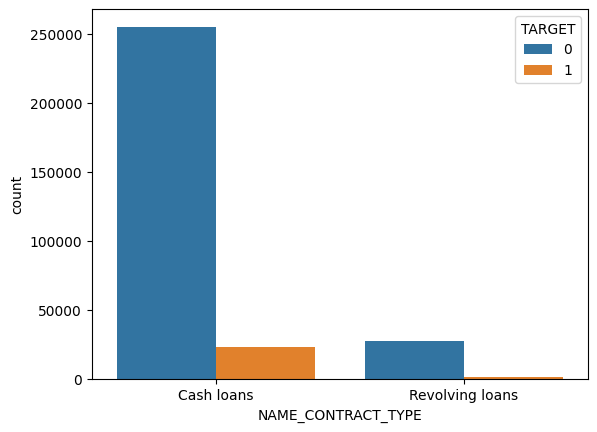

In [77]:
sns.countplot(data=df_app_score_rmd,x='NAME_CONTRACT_TYPE',hue='TARGET');

In [78]:
data_pct = df_app_score_rmd[['NAME_CONTRACT_TYPE' , 'TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()

In [79]:
data_pct['PCT'] = data_pct['TARGET'] * 100

In [80]:
data_pct

,NAME_CONTRACT_TYPE,TARGET,PCT
0,Cash loans,0.083459,8.345913
1,Revolving loans,0.054783,5.478329


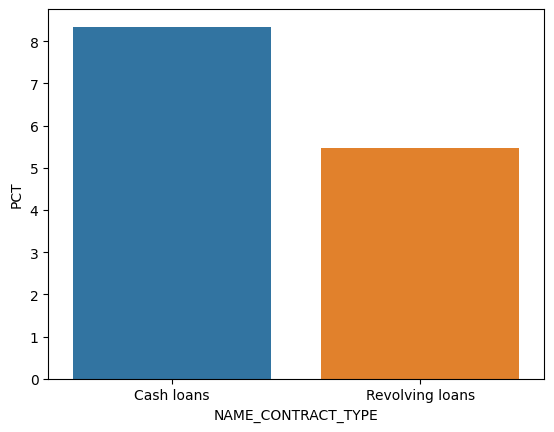

In [81]:
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT');

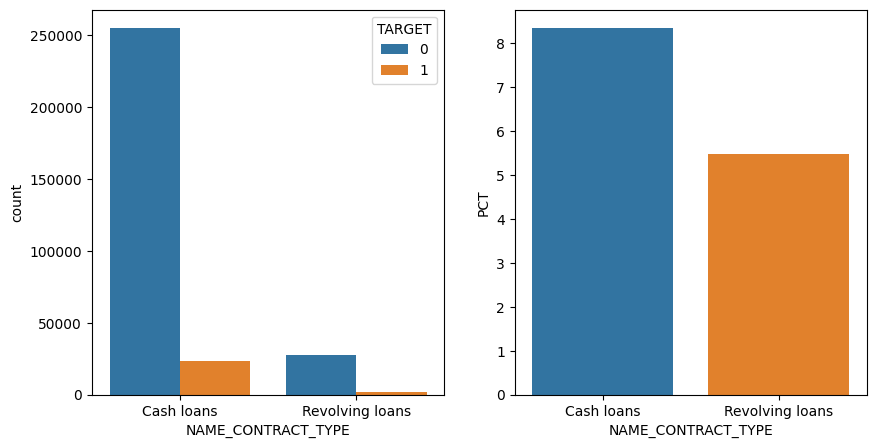

In [82]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df_app_score_rmd,x='NAME_CONTRACT_TYPE',hue='TARGET');
plt.subplot(1,2,2)
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT');

most of customers have taken cash loan.


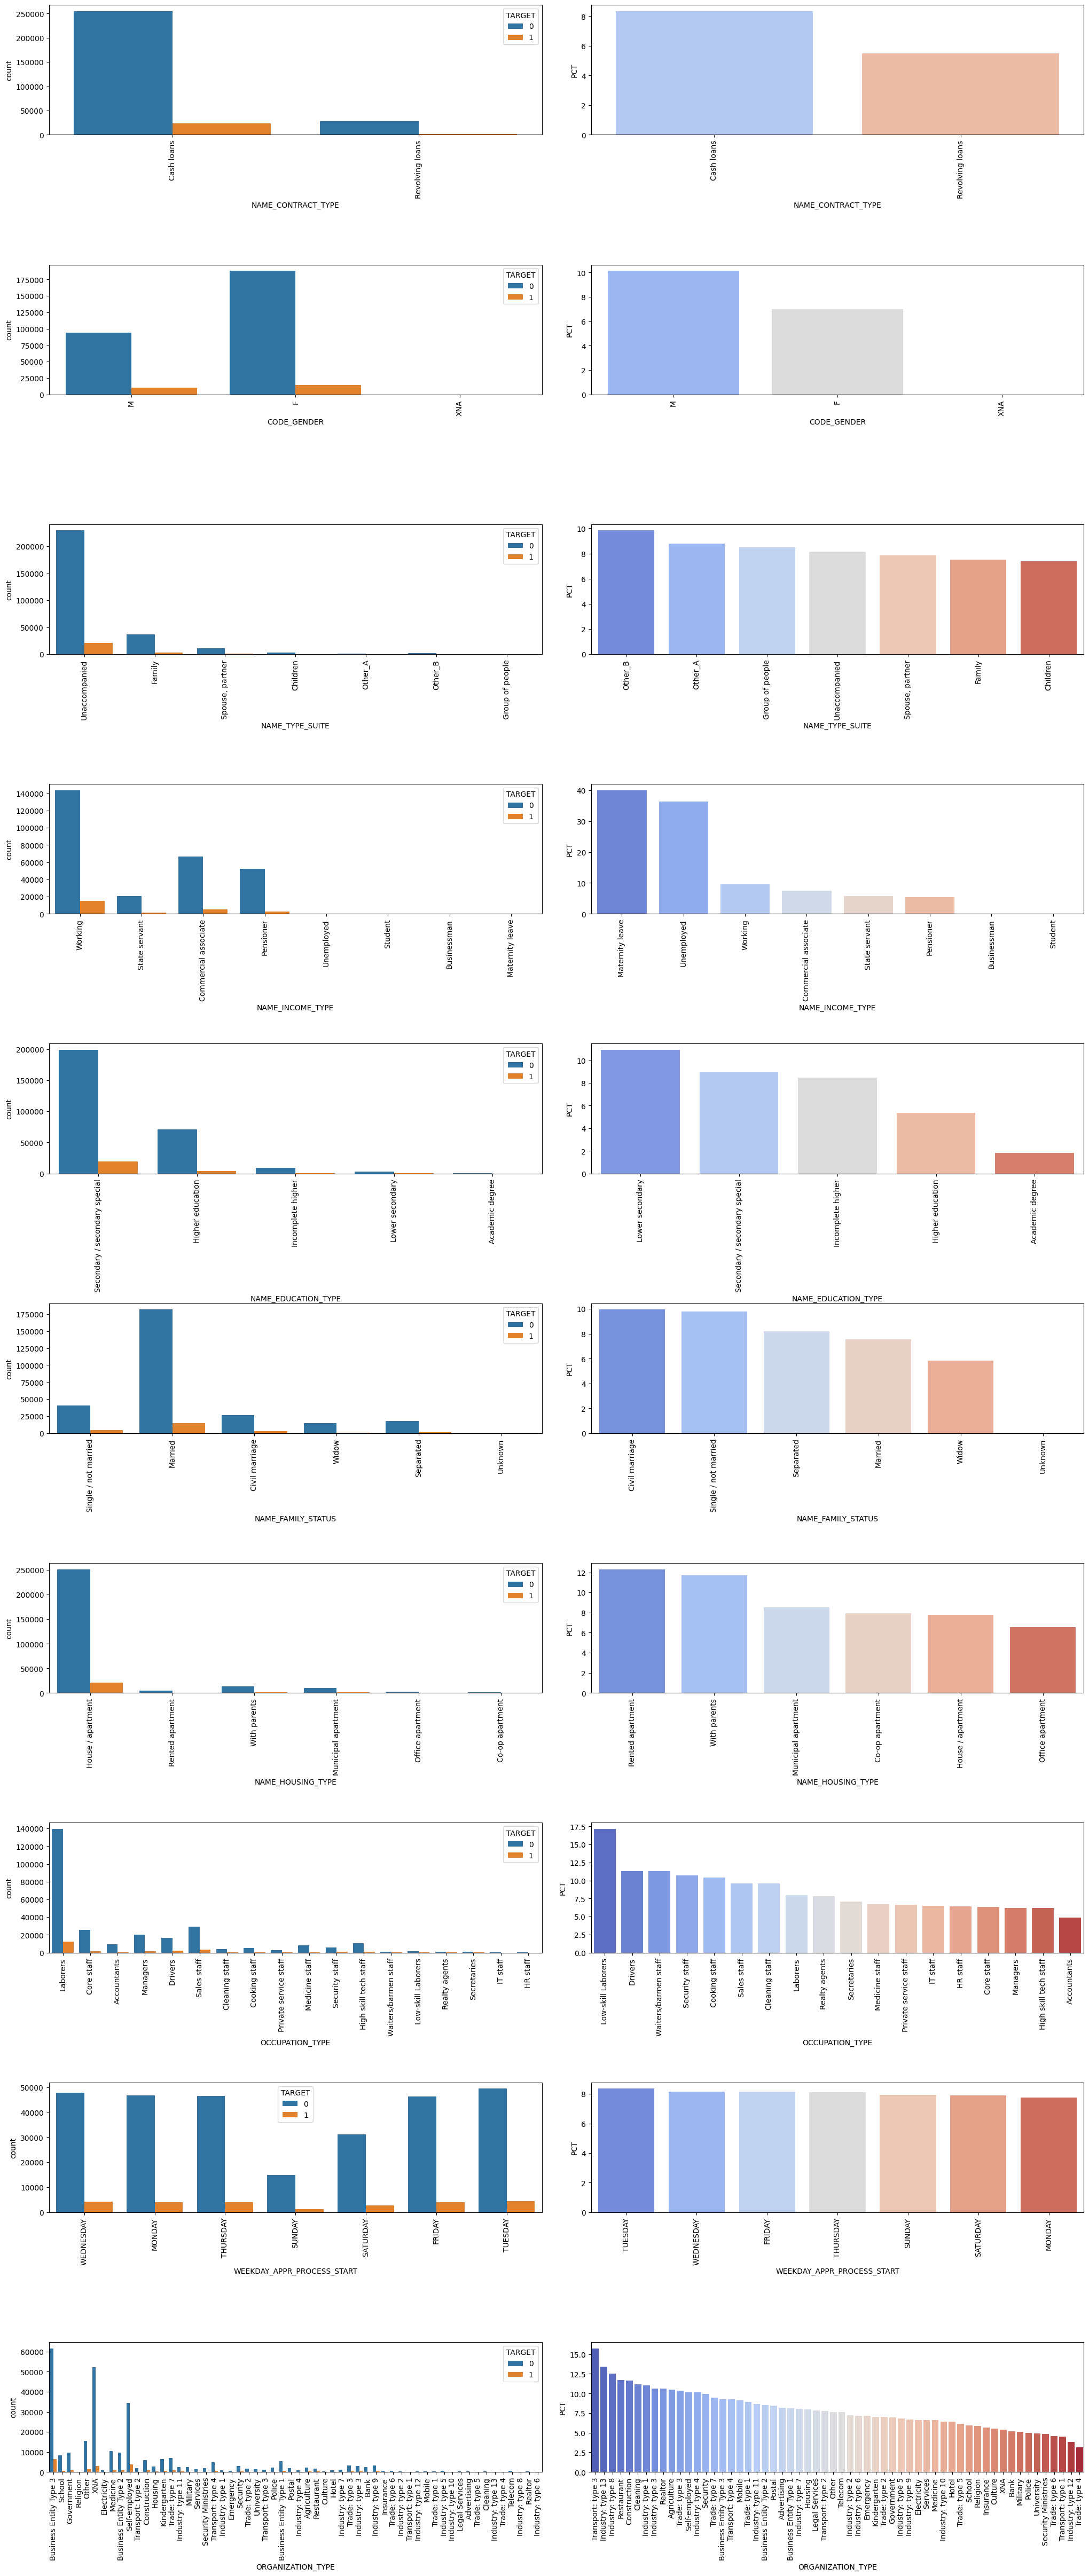

In [83]:
plt.figure(figsize=(25,60))

for i,var in enumerate(obj_var):
    data_pct = df_app_score_rmd[[var , 'TARGET']].groupby([var],as_index=False).mean().sort_values(by='TARGET',ascending=False)
    data_pct['PCT'] = data_pct['TARGET'] * 100
    
    
    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=df_app_score_rmd,x=var,hue='TARGET');
    plt.xticks(rotation=90)
    plt.subplot(10,2,i+i+2)
    sns.barplot(data=data_pct,x=var,y='PCT',palette='coolwarm');
    plt.xticks(rotation=90)

In [84]:
df_app_score_rmd.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [85]:
num_var = df_app_score_rmd.select_dtypes(include=['float64','int64']).columns
num_cat_var = df_app_score_rmd.select_dtypes(include=['float64','int64','category']).columns
num_var

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [86]:
num_data =  df_app_score_rmd[num_var]

In [87]:
defaulters = num_data[num_data['TARGET'] == 1].drop(['TARGET'],axis=1)
repayers = num_data[num_data['TARGET'] == 0].drop(['TARGET'],axis=1)
repayers.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,477,2.0,2,2,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0


In [88]:
defaulters.corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.005144,-0.010165,-0.001290,-0.007578,-0.001814,0.006301,0.001254,-0.005161,-0.006342,0.002539,-0.003816,-0.005936,-0.004135,0.005004,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929,-0.009395,-0.005549,-0.009058,-0.009428,-0.002455,-0.011106,-0.007388,-0.003075,0.005180,-0.001614,0.006843
CNT_CHILDREN,-0.005144,1.000000,0.004796,-0.001675,0.031257,-0.008111,-0.031975,-0.259109,-0.192864,-0.149154,0.032299,0.885484,0.040680,0.043185,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,0.025804,0.001448,0.025180,-0.005106,-0.011547,0.000316,-0.011255,-0.009316,-0.008852,-0.013029,-0.027253
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000,0.038131,0.046421,0.037591,0.009135,-0.003096,-0.014977,-0.000158,0.004215,0.006654,-0.021486,-0.022808,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,-0.004709,-0.005186,-0.004616,-0.004866,0.002429,0.001079,0.000135,0.000941,0.005718,0.001037,0.004516
AMT_CREDIT,-0.001290,-0.001675,0.038131,1.000000,0.752195,0.982783,0.069161,0.135316,0.001930,0.025854,0.052329,0.051224,-0.059193,-0.071377,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.019098,-0.025979,0.019487,-0.030880,0.110851,-0.003771,0.004346,0.010598,0.056227,-0.007201,-0.020698
AMT_ANNUITY,-0.007578,0.031257,0.046421,0.752195,1.000000,0.752295,0.071690,0.014303,-0.081207,-0.034279,0.016767,0.075711,-0.073784,-0.089291,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.004463,-0.022394,0.005500,-0.027495,0.079870,0.012968,0.000074,0.028784,0.049000,-0.007261,-0.009819
AMT_GOODS_PRICE,-0.001814,-0.008111,0.037591,0.982783,0.752295,1.000000,0.076053,0.135738,0.006648,0.025661,0.056061,0.047367,-0.066367,-0.077170,0.044302,0.022406,0.036285,0.035505,-0.034085,-0.038915,-0.016703,0.019892,-0.021781,0.020366,-0.026175,0.118232,-0.002451,0.005457,0.010793,0.059112,-0.006114,-0.022811
REGION_POPULATION_RELATIVE,0.006301,-0.031975,0.009135,0.069161,0.071690,0.076053,1.000000,0.048190,0.015532,0.056222,0.015537,-0.030163,-0.443236,-0.446977,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.006224,0.025865,0.006793,0.018231,0.055139,-0.000710,-0.004546,0.003485,0.065248,-0.004433,0.003198
DAYS_BIRTH,0.001254,-0.259109,-0.003096,0.135316,0.014303,0.135738,0.048190,1.000000,0.582185,0.289114,0.252863,-0.203267,-0.033928,-0.033631,-0.062172,-0.054654,-0.069564,-0.045517,-0.161858,-0.215192,-0.123623,0.005164,-0.004946,0.005391,-0.004001,0.111199,-0.011650,0.007956,0.008244,0.010923,0.022904,0.083838
DAYS_EMPLOYED,-0.005161,-0.192864,-0.014977,0.001930,-0.081207,0.006648,0.015532,0.582185,1.000000,0.192455,0.229090,-0.186515,0.003490,0.002888,-0.060000,-0.035025,-0.091145,-0.078787,-0.088177,-0.245827,-0.198484,-0.008019,0.003191,-0.008305,0.005391,0.001402,-0.007307,0.019381,0.013237,-0.023088,0.012230,0.030812
DAYS_REGISTRATION,-0.006342,-0.149154,-0.000158,0.025854,-0.034279,0.025661,0.056222,0.289114,0.192455,1.000000,0.096833,-0.145828,-0.103855,-0.100285,0.032518,-0.020403,-0.021183,-0.015547,-0.048585,-0.088427,-0.062636,-0.014104,-0.010299,-0.014522,-0.009157,0.071727,0.004798,0.007868,-0.002278,-0.003401,0.012512,0.013572


In [89]:
amt_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

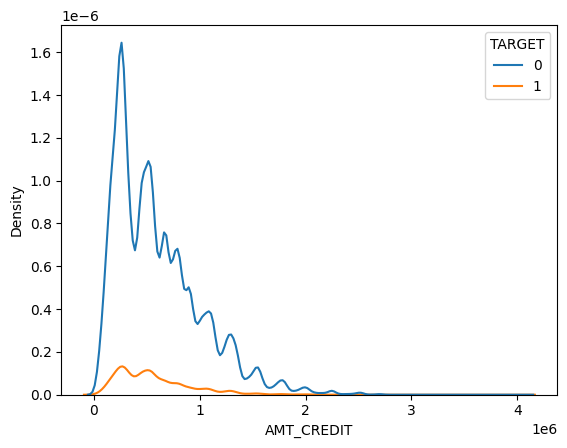

In [90]:
sns.kdeplot(data=num_data,x='AMT_CREDIT',hue='TARGET');

### Univariate Numeric Analysis

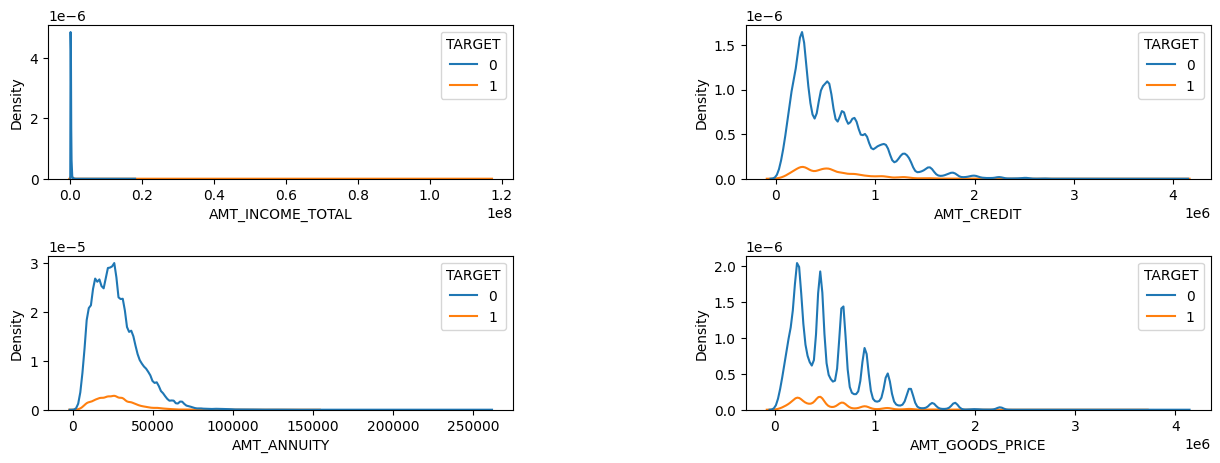

In [91]:
plt.figure(figsize=(15,5))

for i,col in enumerate(amt_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue='TARGET');
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

### Univariate Numeric Analysis

1) most of the loans were given for the goods price ranging between 0 to 1 ml
2) most of the loans were given for the credit amount of 0 to 1ml 
3) most of the customers are paying annuity of 0 to 50k 
4) most of the customer have income between 0 to 1ml

### Bivariate Numeric Analysis

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

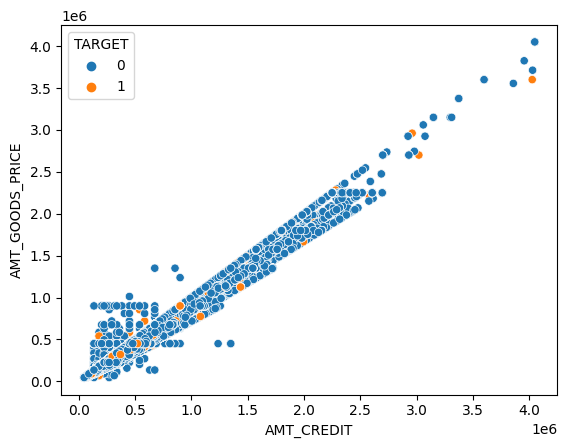

In [92]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='AMT_GOODS_PRICE',hue='TARGET')

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

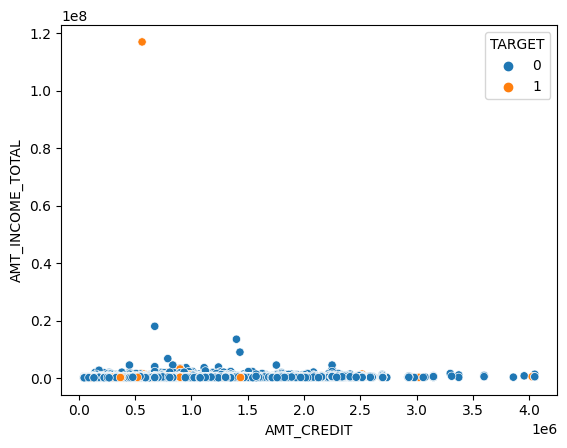

In [93]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')

<Axes: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

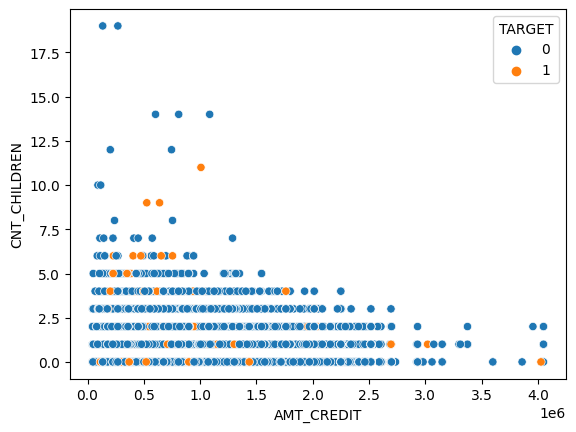

In [94]:

sns.scatterplot(data=num_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

In [95]:
amt_var = num_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE' , 'TARGET']]

c:\Users\Hariram\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


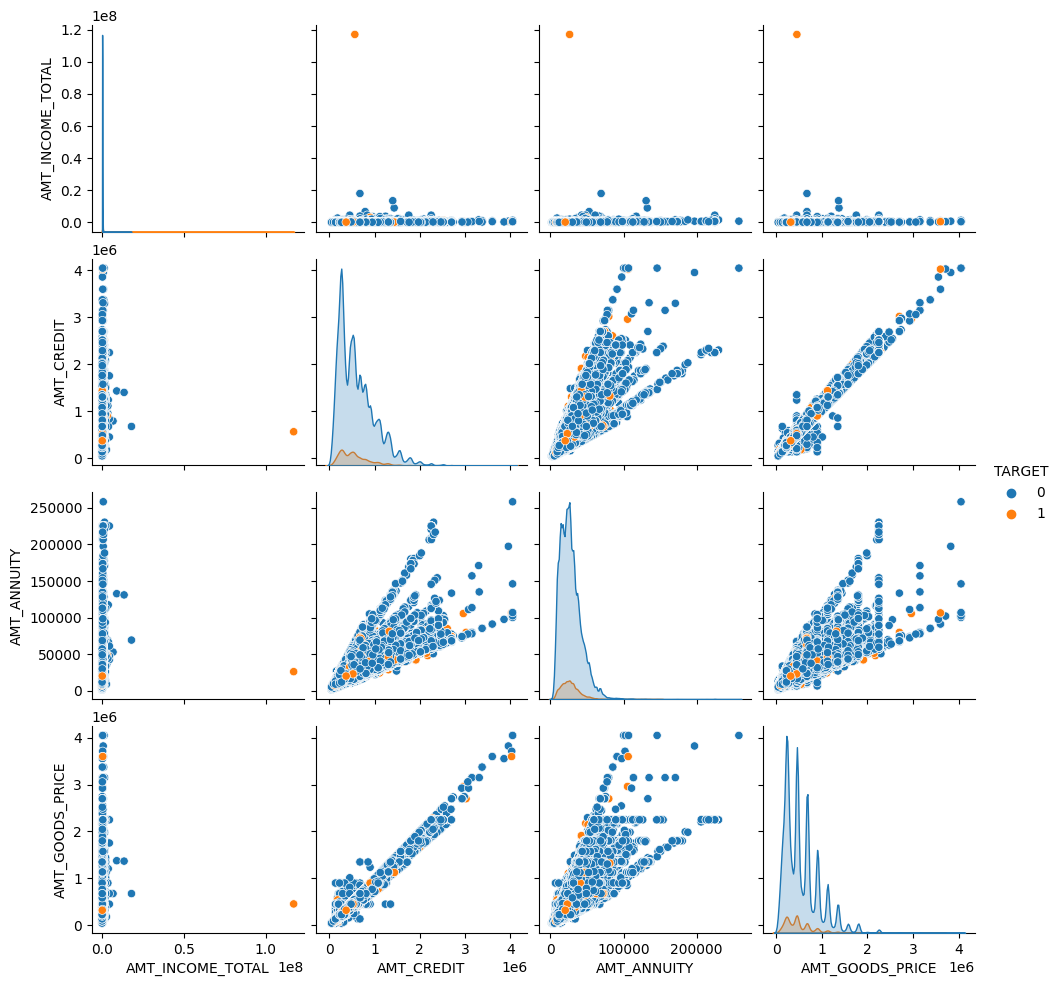

In [96]:
sns.pairplot(data=amt_var,hue='TARGET')

### Bivariate Analysis

1) AMT_CREDIT and AMT_GOODS_PRICE are linearly corelated, if the AMT_CREDIT increases the defaulters are decreasing
2) people having income less than or equals to 1 ml, are more like to take loans out of which who are taking loan of less than 1.5 million, coudl turn out to be defaulters. 
3) we can target income below 1 million and loan maount greater than 1.5 million
4) people having children 1 to less than 5 are safer to give the loan
5) People who can pay the annuity of 100K are more like to get the loan and that's upto less than 2ml (safer segment)

In [97]:
null_count = pd.DataFrame(df_prev.isnull().sum().sort_values(ascending=False)/df_prev.shape[0]*100).reset_index().rename(columns={'index':'var',0:'count_pct'})
null_count
var_msng_ge_40 = list(null_count[null_count['count_pct']>=40]['var']) 
var_msng_ge_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [98]:
nva_cols = var_msng_ge_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
len(nva_cols)

15

In [99]:
len(df_prev.columns)

37

In [100]:
df_prev_nva_cols = df_prev.drop(labels=nva_cols,axis=1)

len(df_prev_nva_cols.columns)

22

In [101]:
df_prev_nva_cols.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [102]:
df_prev_nva_cols.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [103]:
df_prev_nva_cols.isnull().sum().sort_values(ascending=False)/df_prev_nva_cols.shape[0]*100

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

In [104]:
df_prev_nva_cols['AMT_GOODS_PRICE'].agg(func=['mean','median'])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [105]:
df_prev_nva_cols['AMT_GOODS_PRICE_MEDIAN'] = df_prev_nva_cols['AMT_GOODS_PRICE'].fillna(df_prev_nva_cols['AMT_GOODS_PRICE'].median())
df_prev_nva_cols['AMT_GOODS_PRICE_MEAN'] = df_prev_nva_cols['AMT_GOODS_PRICE'].fillna(df_prev_nva_cols['AMT_GOODS_PRICE'].mean())
df_prev_nva_cols['AMT_GOODS_PRICE_MODE'] = df_prev_nva_cols['AMT_GOODS_PRICE'].fillna(df_prev_nva_cols['AMT_GOODS_PRICE'].mode()[0])

In [106]:
gp_cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

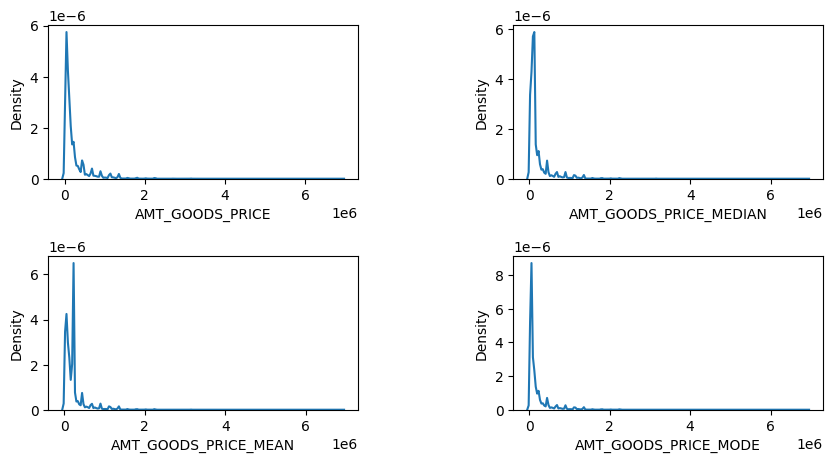

In [107]:
plt.figure(figsize=(10,5))
for i,col in enumerate(gp_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=df_prev_nva_cols,x=col)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [108]:
df_prev_nva_cols['AMT_GOODS_PRICE'] = df_prev_nva_cols['AMT_GOODS_PRICE'].fillna(df_prev_nva_cols['AMT_GOODS_PRICE'].median())

In [109]:
df_prev_nva_cols['AMT_GOODS_PRICE'].isnull().sum()

0

In [110]:
df_prev_nva_cols['AMT_ANNUITY'].agg(func=['mean','median','max'])

mean       15955.120659
median     11250.000000
max       418058.145000
Name: AMT_ANNUITY, dtype: float64

In [111]:
df_prev_nva_cols['AMT_ANNUITY'].isnull().sum()

372235

In [112]:
df_prev_nva_cols['AMT_ANNUITY'] = df_prev_nva_cols['AMT_ANNUITY'].fillna(df_prev_nva_cols['AMT_GOODS_PRICE'].median())

In [113]:
df_prev_nva_cols['PRODUCT_COMBINATION'].head()

0    POS mobile with interest
1            Cash X-Sell: low
2           Cash X-Sell: high
3         Cash X-Sell: middle
4           Cash Street: high
Name: PRODUCT_COMBINATION, dtype: object

In [114]:
df_prev_nva_cols['PRODUCT_COMBINATION'] = df_prev_nva_cols['PRODUCT_COMBINATION'].fillna(df_prev_nva_cols['PRODUCT_COMBINATION'].mode()[0])

In [115]:
df_prev_nva_cols['CNT_PAYMENT'].agg(func=['mean','median','max'])

mean      16.054082
median    12.000000
max       84.000000
Name: CNT_PAYMENT, dtype: float64

In [116]:
df_prev_nva_cols[df_prev_nva_cols['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [117]:
df_prev_nva_cols['CNT_PAYMENT'] = df_prev_nva_cols['CNT_PAYMENT'].fillna(0)

In [118]:
df_prev_nva_cols.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
NAME_GOODS_CATEGORY       0
AMT_GOODS_PRICE_MEAN      0
AMT_GOODS_PRICE_MEDIAN    0
PRODUCT_COMBINATION       0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_CLIENT_TYPE          0
SK_ID_CURR                0
CODE_REJECT_REASON        0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
AMT_GOODS_PRICE_MODE      0
dtype: int64

In [119]:
df_prev_nva_cols = df_prev_nva_cols.drop(labels=['AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE'],axis=1 )

In [120]:
df_prev_nva_cols.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
NAME_CLIENT_TYPE          0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_GOODS_CATEGORY       0
CODE_REJECT_REASON        0
SK_ID_CURR                0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
PRODUCT_COMBINATION       0
dtype: int64

In [121]:
len(df_prev_nva_cols.columns)

22

In [122]:
merged_df = pd.merge(df_app_score_rmd,df_prev_nva_cols,how='inner',on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,300k-400k,200k-250k,400k-600k,0k-25k,0-5Y,20Y-30Y,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900k,250k-300k,Above 1M,25k-50k,0-5Y,40Y-50Y,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900k,250k-300k,Above 1M,25k-50k,0-5Y,40Y-50Y,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900k,250k-300k,Above 1M,25k-50k,0-5Y,40Y-50Y,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,100k-200k,0k-100k,0k-200k,0k-25k,0-5Y,50Y-60Y,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


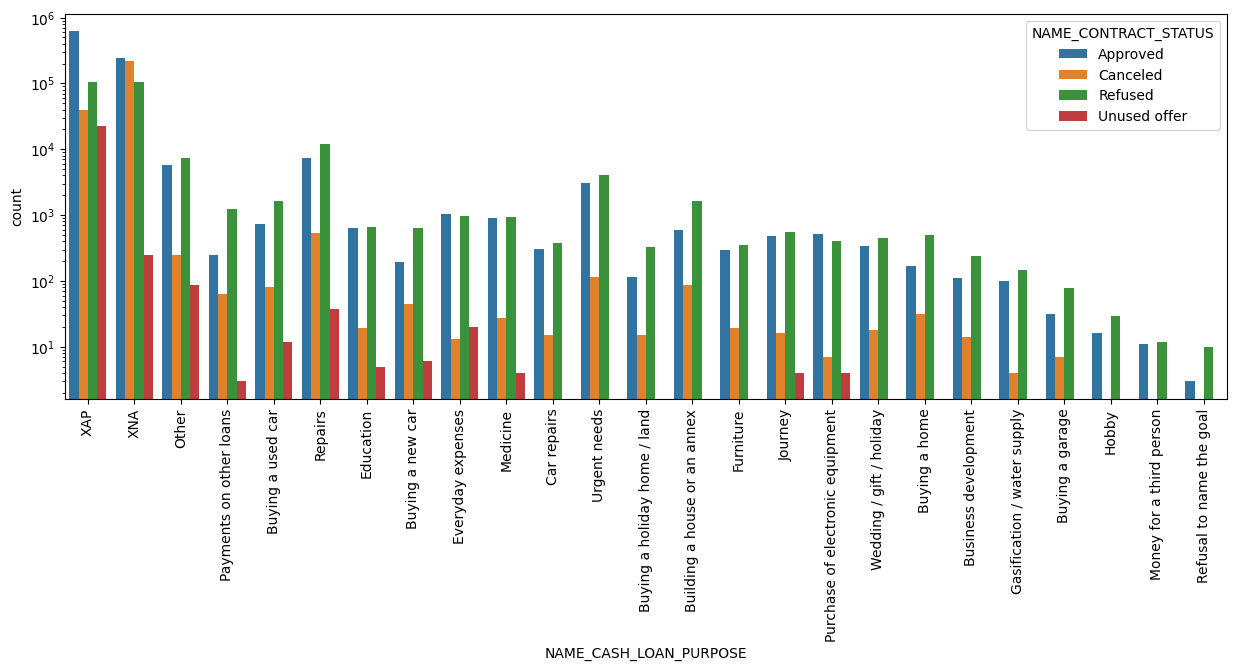

In [123]:
plt.figure(figsize=(15,5))
sns.countplot(data=merged_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

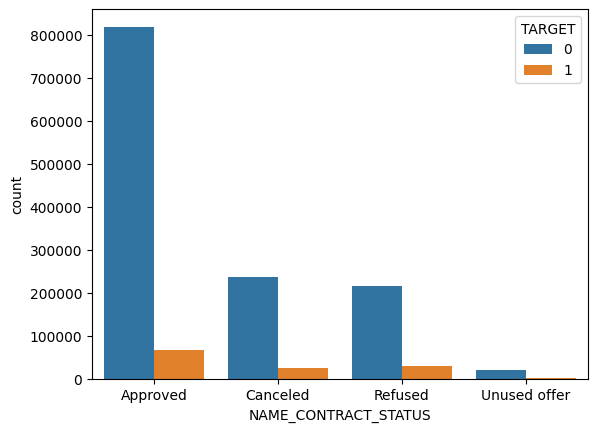

In [124]:
sns.countplot(data=merged_df,x='NAME_CONTRACT_STATUS',hue='TARGET')

In [126]:
merged = merged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
sum_agg = merged.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()

merged_agg = pd.merge(merged,sum_agg,how='left',on='NAME_CONTRACT_STATUS')
merged_agg['pct'] = round(merged_agg['counts_x'] / merged_agg['counts_y']*100,2)
merged_agg

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,818856,886099,92.41
1,Approved,1,67243,886099,7.59
2,Canceled,0,235641,259441,90.83
3,Canceled,1,23800,259441,9.17
4,Refused,0,215952,245390,88.00
5,Refused,1,29438,245390,12.00
6,Unused offer,0,20892,22771,91.75
7,Unused offer,1,1879,22771,8.25


C:\Users\Hariram\AppData\Local\Temp\ipykernel_3448\563267390.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

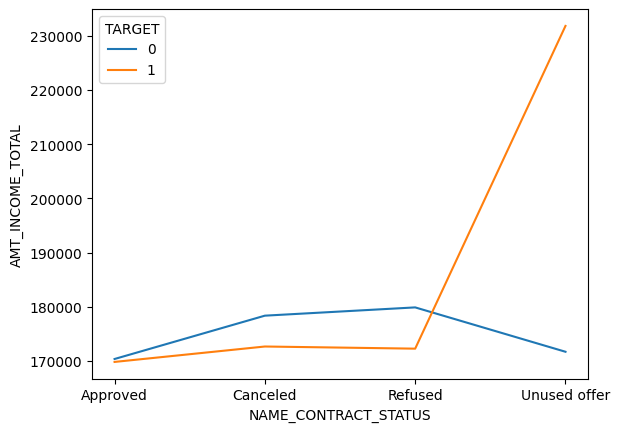

In [127]:
sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')

In [129]:
len(merged_df.columns)

70

In [130]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,300k-400k,200k-250k,400k-600k,0k-25k,0-5Y,20Y-30Y,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900k,250k-300k,Above 1M,25k-50k,0-5Y,40Y-50Y,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900k,250k-300k,Above 1M,25k-50k,0-5Y,40Y-50Y,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Above 900k,250k-300k,Above 1M,25k-50k,0-5Y,40Y-50Y,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,100k-200k,0k-100k,0k-200k,0k-25k,0-5Y,50Y-60Y,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


## Decisive factor in whether an applicant will defaulter:

CODE_GENDER - 
 
     most of the loans have been taken by female
     default rate for females are just ~7% which is safer and lesser than male

NAME_TYPE_SUITE -

      unacompanied people had tanke most of the loans and the default rate is ~8.5% which is still okay

NAME_INCOME_TYPE - 
 
     the safest segments are working, commercial associates and pensioners

NAME_EDUCATION_TYPE - 
 
     Higher education is the safest segment to give the loan with a default rate of less than 5%

NAME_FAMILY_STATUS - 
 
     Married people are safe to target, default rate is 8%

NAME_HOUSING_TYPE - 
 
     People having house/appartment are safe to give the loan with default rate of ~8%

OCCUPATION_TYPE - 
 
     Low-Skill Laboreres and drivers are highest defaulters
     Accountants are less defaulters
     Core staff, Managers and Laborers are safer to target with a default rate of <= 7.5 to 10%

ORGANIZATION_TYPE - 
 
     Transport type 3 highest defaulter
     Others, Business Entity Type 3, Self Employed are good to go with default rate around 10 %

## Final Conclusion 

#### Bank should target the customers

1) Having low income i.e. below 1 ml
2) Working in Others, Business Entity Type 3, Self Employed  org. type
3) Working as Accountants, Core staff, Managers and Laborers 
4) Having house/appartment and are married and having children not more than 5
5) Highly educated
6) Preferably female
7) Unacompanied people can be safer -  default rate is ~8.5%

#### Amount segment recommended

1) The credit amount should not be more than 1 ml
2) Annuity can be made of 50K (depending on the eligibility)
3) Income bracket could be below 1 ml
4) 80-90% of the customer who were prev. canceled/refused, are repayers. Bank can do the analysis and can consider to give loan to these segments
